<a href="https://colab.research.google.com/github/Calvince1/Cal/blob/main/Attrition_WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math 
import numpy as np
import scipy.stats as scs 
import statsmodels.api as sm 
from pylab import mpl, plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
#Importing Data
df = pd.read_csv('/content/drive/MyDrive/PDS_REV/Data Sets/Employee-Attritionv1 - Employee-Attritionv1.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Data Cleaning

In [ ]:
#df.shape
print("There are,", df.shape, "data points")

There are, (1470, 35) data points


In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
#Missing Vaues
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [ ]:
print(df.isnull().mean()*100)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

<AxesSubplot:>

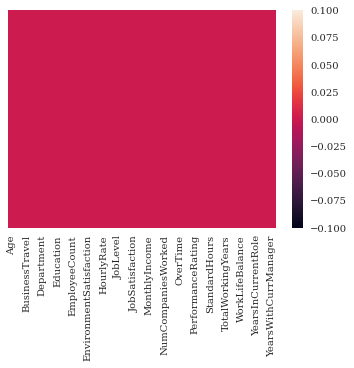

In [ ]:
#Visualizing null values
sns.heatmap(df.isnull(), yticklabels=False)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#Reference code
#Revenue_Expenditure['TOTAL REVENUE'] = Revenue_Expenditure['TOTAL REVENUE'].str.replace(    ',', '').astype(float).astype(int)
#Revenue_Expenditure['TOTAL EXPENDITURE'] = Revenue_Expenditure['TOTAL EXPENDITURE'].str.replace(    ',', '').astype(float).astype(int)


DATA ANALYSIS

In [ ]:
df2 = df[['Age', 'Attrition','DailyRate', 'Department','Gender','HourlyRate','MonthlyIncome','OverTime', 'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany' ]].copy()
df2.head()

,Age,Attrition,DailyRate,Department,Gender,HourlyRate,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,41,Yes,1102,Sales,Female,94,5993,Yes,11,3,6
1,49,No,279,Research & Development,Male,61,5130,No,23,4,10
2,37,Yes,1373,Research & Development,Male,92,2090,Yes,15,3,0
3,33,No,1392,Research & Development,Female,56,2909,Yes,11,3,8
4,27,No,591,Research & Development,Male,40,3468,No,12,3,2


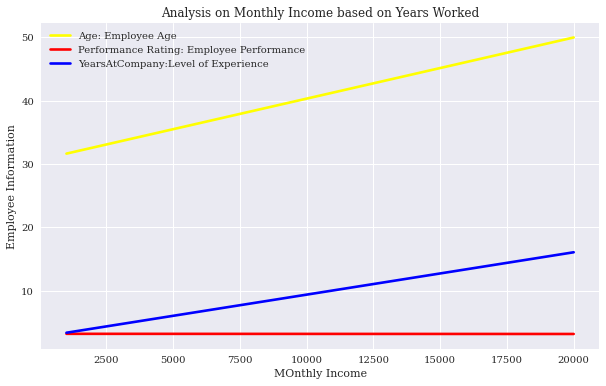

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Analysis on Monthly Income based on Years Worked")
sns.regplot(x="MonthlyIncome", y="Age", data=df2, color="yellow",label="Age: Employee Age", 
            scatter= False, ci= None)
sns.regplot(x="MonthlyIncome", y="PerformanceRating", data=df2, color="red", label="Performance Rating: Employee Performance",
           scatter= False, ci= None)
sns.regplot(x="MonthlyIncome", y= "YearsAtCompany", data=df2, color="blue", label="YearsAtCompany:Level of Experience",
            scatter= False, ci= None)
plt.xlabel("MOnthly Income")
plt.ylabel("Employee Information")
plt.legend(loc="upper left")
plt.show()

,Age,DailyRate,HourlyRate,MonthlyIncome,PercentSalaryHike,PerformanceRating,YearsAtCompany
Age,1.000000,0.010661,0.024287,0.497855,0.003634,0.001904,0.311309
DailyRate,0.010661,1.000000,0.023381,0.007707,0.022704,0.000473,-0.034055
HourlyRate,0.024287,0.023381,1.000000,-0.015794,-0.009062,-0.002172,-0.019582
MonthlyIncome,0.497855,0.007707,-0.015794,1.000000,-0.027269,-0.017120,0.514285
PercentSalaryHike,0.003634,0.022704,-0.009062,-0.027269,1.000000,0.773550,-0.035991
PerformanceRating,0.001904,0.000473,-0.002172,-0.017120,0.773550,1.000000,0.003435
YearsAtCompany,0.311309,-0.034055,-0.019582,0.514285,-0.035991,0.003435,1.000000


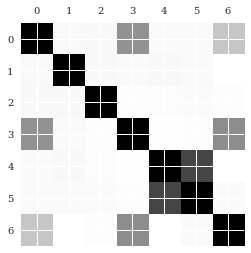

In [ ]:
plt.matshow(df2.corr())
df2.corr()

**Visualization**

In [ ]:
x = ['Attrition','Gender']
h = [100,200,300]

plt.bar()
plt.title("Grades by Study Time and internet Availability")
sns.swarmplot(x="studytime", y="G3", hue="internet", data=df2, size=10)
plt.xlabel("Study Time")
plt.ylabel("Final Grade")

plt.legend(loc="lower right", title="Internet Access", prop={"size":13})
plt.show(

<AxesSubplot:>

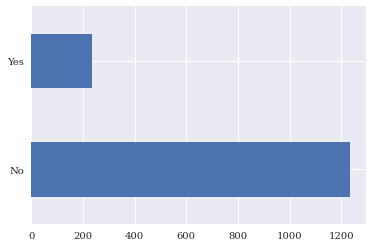

In [ ]:
df2.Attrition.value_counts().plot.barh()

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

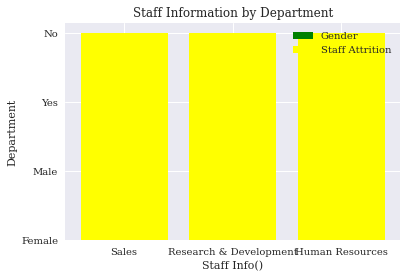

In [ ]:
plt.bar(df2['Department'], df2['Gender'],
         label="Gender", color='green')
plt.bar(df2['Department'], df2['Attrition'], label="Staff Attrition",color='yellow')
plt.title("Staff Information by Department")
plt.ylabel("Department")
plt.xlabel("Staff Info()")
plt.legend()
plt.show()

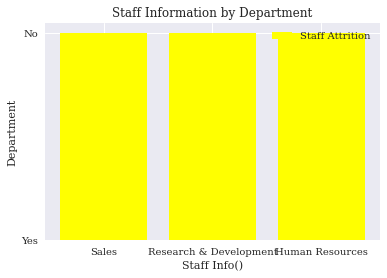

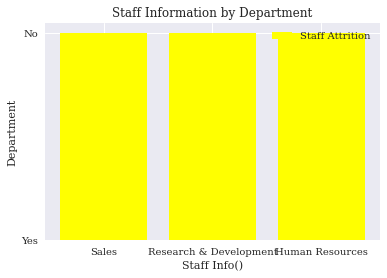

In [ ]:
plt.bar(df2['Department'], df2['Attrition'], label="Staff Attrition",color='yellow')
plt.title("Staff Information by Department")
plt.ylabel("Department")
plt.xlabel("Staff Info()")
plt.legend()
plt.show()

In [ ]:
df_Ejb = pd.read_csv('/content/drive/MyDrive/PDS_REV/Data Sets/EJB.xlsx - Data.csv')
df_Ejb.head()

,Order ID,Flavor,Category,$ Sales,Date Ordered,Date Delivered,Distribution Center,New Customer?,Service Satisfaction Rating,Product Satisfaction Rating
0,92145,Beet,Juices,605.97,01/01/2018,01/03/2018,ID,Yes,3.0,NaN
1,92145,Apple,Juices,1549.00,01/01/2018,01/03/2018,ID,Yes,5.0,4.0
2,92145,Apple,Juices,1986.28,01/01/2018,01/03/2018,ID,Yes,5.0,4.0
3,92145,Orange,Juices,16.43,01/01/2018,01/03/2018,ID,Yes,5.0,3.0
4,92145,Cucumber,Juices,1594.93,01/01/2018,01/03/2018,ID,Yes,NaN,NaN


In [ ]:
df_Ejb.dtypes

AttributeError: ignored